## In the below pictures the `CNN pipeline` and the architecture has been shown.

In [13]:
from PIL import Image
from torchvision import transforms

## Transfroming the image as per convenience.

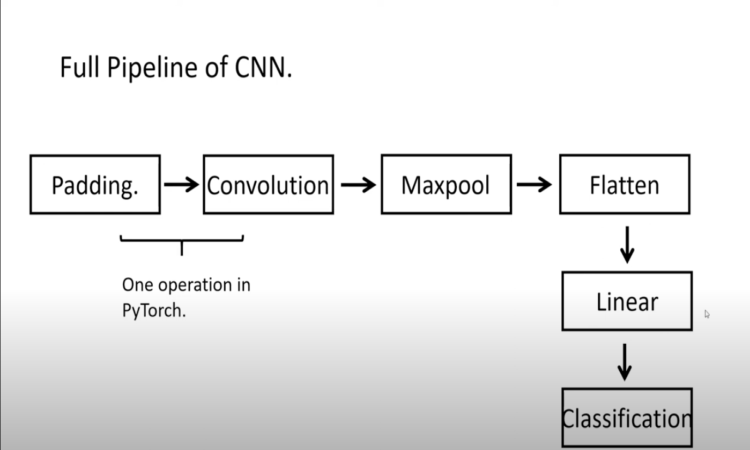

In [131]:
IM = Image.open("CNN_Pipeline.jpg")
JM = Image.open("CNN.jpg")
transform = transforms.Resize((450, 750))
transform(IM)



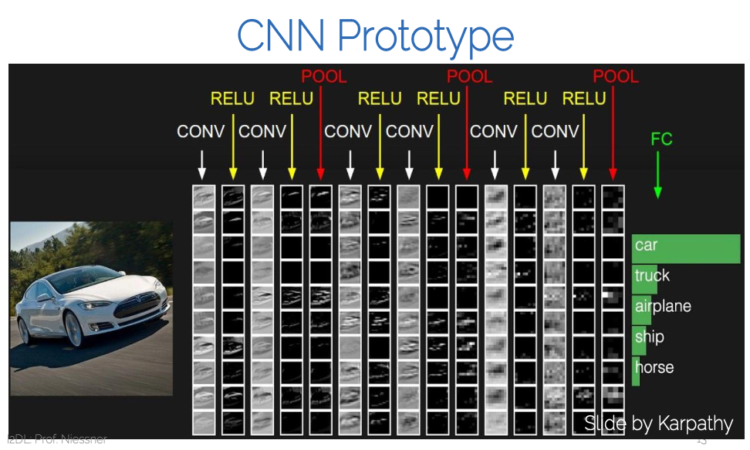

In [29]:
transform(JM)


## Mask will be the kernel size of the CNN filter. That will be sliding over the images.to extract the features.

In [31]:
import numpy as np
import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [32]:
mnist_dataset = datasets.MNIST(root = "./data", train = True, download = True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 6229922.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 26202832.32it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 5496275.01it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4658970.11it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [73]:
data , target = mnist_dataset.data, mnist_dataset.targets
data.shape[0]

60000

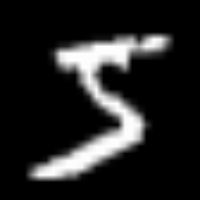

In [133]:
transform = transforms.Resize((200, 200))
transform(transforms.ToPILImage()(data[0]))

# .shape, target.shape

## From here we can see the images of the data set it is a hand written number dataset.

**This is how we have converted tensors to images**

In [237]:
data[0].shape
transform = transforms.Resize((200, 200))
transform(transforms.ToPILImage()(data[0]))
data[0].size()

torch.Size([28, 28])

In [224]:
# the purpose of using stratify is that the distribution of target variables should be balanced in training and test target data.

train_x, test_x, train_y, test_y = train_test_split(data, target, random_state = 1234, test_size = 0.2, stratify = target)
train_x[0].size()

torch.Size([28, 28])

In [245]:
transforms.ToPILImage()(train_x[1])
train_x.size()

torch.Size([48000, 28, 28])

Here as we can see that our network targets are the numbers between 0,1,2...9

In [76]:
train_y

tensor([4, 7, 7,  ..., 7, 6, 2])

## Transforms we are Normalizing with mean 0.1307, 0.3081

In [195]:
transform = transforms.Compose([ 
    transforms.Normalize((0.1307, ), (0.3081))
    
])

### Now we need the datasets and dataloader functions 

In [215]:
class Dataset(torch.utils.data.Dataset):
# here we have data and terget hence we will return the item for both hence there will be two variables.
    def __init__(self,data, target, transform = None):
        self.data = data
        self.target = target
        self.transform = transform
    def __len__(self):
        return self.data.shape[0] # or here we can say len(data) instead of data.shape(0)
    
    
    def __getitem__(self, idx):
        x = self.data[idx][None, ...].float()/255 # here we are adding [None, ...] so that we can get the image
        # this mnist dataset is a data-set of black & white images so we need the size of [1,28,28]
        y = self.target[idx]
        if self.transform is not None:
            x = self.transform(x)
        return x

In [216]:
data.shape[0]

60000

#### AS we can see the below pic is an normalized image with given mean and variance.

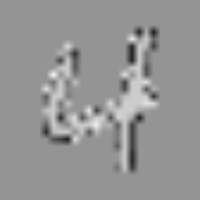

In [217]:
# checking if the Dataset class is working 
Dataset(train_x, train_y, transform).__getitem__(0) # got item of the perticuler data set instance tensor 
transforms.ToPILImage()(Dataset(train_x, train_y, transform).__getitem__(0)) # converted above tensor to image
Dataset(train_x, train_y, transform).__getitem__(0) # this will give use a tensor 
# transform_m = transforms.Resize((200, 200))
transform_m(transforms.ToPILImage()(Dataset(train_x, train_y, transform).__getitem__(0))) # this will resize and convert 
# that tensor to an Image.
# Dataset(train_x, train_y, transform).__getitem__(0)


### To get the data for training the neural network we need to implement the dataloader also.

In [212]:
train_dl = torch.utils.data.DataLoader(Dataset(train_x, train_y, transform), batch_size = 20, shuffle = True, 
                                       num_workers = 2)
test_dl = torch.utils.data.DataLoader(Dataset(test_x, test_y, transform), batch_size = 20, shuffle = True, 
                                      num_workers = 2)



<function Tensor.size>

### Defining the number of layers and weights of the network.

In [263]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
# in the below code :: 1 -> input channels, 8 -> output channels, 3 -> kernel(filter)size, -> stride -> 1, padding -> 1
       
        # input image size is [20, 1 * 28 * 28] 1 -> no of channels, 28*28 is 2d image size, 20 batch size.
        self.conv1 = nn.Conv2d(1, 8, 3, stride = 1, padding =1)
        # size = 20 , 8 * 28 * 28 output image size here 8 are number of channels, 20 batch size.
        self.maxpool1 = nn.MaxPool2d(2)
        # batch size -> 20, input size -> 8 * 14 * 14 
        self.relu1 = nn.ReLU() 
        # output size -> 20, 8 * 14 * 14 
        self.conv2 = nn.Conv2d(8, 16, 3, stride =1, padding =1)
        # output size -> 20, 16 * 14 * 14 
        self.maxpool2 = nn.MaxPool2d(2) # here bydefault stride will be -> 2
        # output size -> 20, 16 * 7 * 7
        self.relu2 = nn.ReLU()
         # output size -> 20, 16 * 7 * 7
# After this we will ``flatten`` the resulting layer

        # Now we are adding fully connected layers.
        self.fc = nn.Linear(16*7*7, 10) # input is 16 *7*7 because we have 16 feature maps size of 16 * 16 
        # 16*7*7, 10 here we took the output as 10 because we are looking for number betwee 0 and 10.
        # now the output is 20 * 10, 20 -> batch size , 10 -> number of outputs 
#         self.SetMax()÷
        
# After defining all the layers we will define the forward function.

    def forward(self, input):
        output1 = self.conv1(input)
        output2 = self.maxpool1(output1)
        output3 = self.relu1(output2)
        output4 = self.conv2(output3)
        output5 = self.maxpool2(output4)
        output6 = self.relu2(output5)
        output7 = torch.flatten(output6,1)
        output8 = self.fc(output7)
        return output8
        

In [264]:
model = CNN()

In [265]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [252]:
num_epochs = 1000
training_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_epoch_loss = 0
    val_epoch_loss = 0
    for data, target in train_dl:
        output = model(data)
        loss = loss_fn(output, target)
        
    
    